# Hyalophane analyses at ANU

## Set up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up to find custom python package
import os
import sys
import numpy as np
sys.path.insert(1, ".")
sys.path.insert(1, "..")

In [3]:
from src import readfiles, wdscan, correct_quant, calczaf, helper_funs
import pickle
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

## Hyalophane
* Analysed at St Andrews
* Using GaN standard

### WD scan - visualise & fit

Saved figure for hyalophane


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'hyalophane'}, xlabel='L (mm)', ylabel='cps/nA'>)

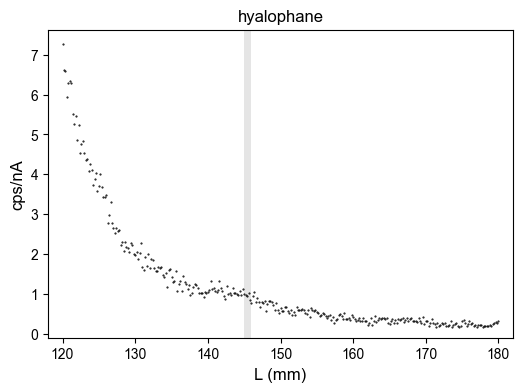

In [4]:
# ------#### INPUT #### -----------------------------
# Where is the data stored?
scan_path = Path('../data/raw/hyalophane_StA/wd_scans/albite_22122021_0006_QLW/Pos_0001/')
# What's the sample name?
sample = 'hyalophane'
# Option to add peak position markers to plot:
pk_pos_markers =  [146.6] #
# ---------------------------------------------------
# Read in the data
comments, data = readfiles.import_jeol_wdscans(
    subfolder=Path("../data/raw/hyalophane_StA/wd_scans/hyalophane_22122021_0010_QLW/Pos_0002"),
    comment_line_num=80
)

# Plot the data without fitting
wdscan.plot_wdscan(comments, data, save_to="../data/interim/hyalophane_StA/wd_scan.png")

Saved figure showing fit to hyalophane in folder "..\data\interim\hyalophane_StA\fits"
Saved fit parameters for hyalophane


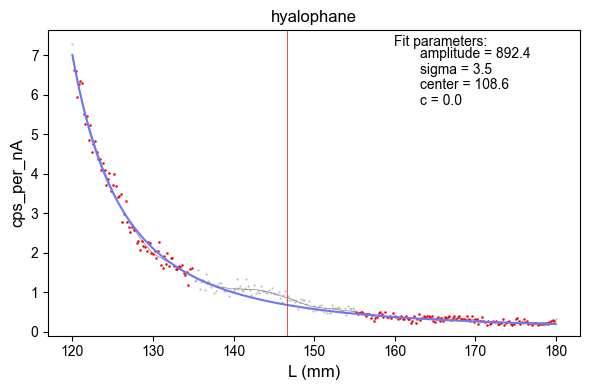

In [5]:
# Fit and plot with the fits ------------
# Choose parts of the spectrum to use in the fit
bg_roi = [[120,135], [155, 180]]

trimmed_data = wdscan.trim_data_from_regions(data, bg_roi)
out = wdscan.fit_bg(trimmed_data)
wdscan.plot_bg_fit(data, trimmed_data, out, sample, pk_pos_markers, save_to=Path("../data/interim/hyalophane_StA/fits"))
par_dict = wdscan.write_fit_params(out, sample, save_to=Path("../data/interim/hyalophane_StA/fits/"))

### Quant analysis

In [6]:
samples = ['hyalophane'] # List of samples in this dataset
sample_folders = [Path('../data/raw/hyalophane_StA/hyalophane_using_GaN_standard/')] # List of folders corresponding to the samples
category = 'hyalophane' # Category of this dataset (e.g. "glasses")

wd_scan = Path('../data/interim/hyalophane_StA/fits/key_params_hyalophane.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('data/_dictionaries/standards.csv')

In [7]:
datalist = readfiles.find_files_and_folders(
                samples, sample_folders,
                apf_file=Path('../data/_dictionaries/apf_values.csv'), #<- Can put None in here
                wd_scan=wd_scan
                )

datalist

Comments found: ['hyalophane_50nA_20um_GaNcalibr_5', 'hyalophane_50nA_20um_GaNcalibr_6', 'hyalophane_50nA_20um_GaNcalibr_7', 'hyalophane_50nA_20um_GaNcalibr_8', 'hyalophane_50nA_20um_GaNcalibr_9']


,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\hyalophane_StA\hyalophane_using_Ga...,hyalophane_50nA_20um_GaNcalibr_5,hyalophane,..\data\interim\hyalophane_StA\fits\key_params...,0.819,0.013
1,..\data\raw\hyalophane_StA\hyalophane_using_Ga...,hyalophane_50nA_20um_GaNcalibr_6,hyalophane,..\data\interim\hyalophane_StA\fits\key_params...,0.819,0.013
2,..\data\raw\hyalophane_StA\hyalophane_using_Ga...,hyalophane_50nA_20um_GaNcalibr_7,hyalophane,..\data\interim\hyalophane_StA\fits\key_params...,0.819,0.013
3,..\data\raw\hyalophane_StA\hyalophane_using_Ga...,hyalophane_50nA_20um_GaNcalibr_8,hyalophane,..\data\interim\hyalophane_StA\fits\key_params...,0.819,0.013
4,..\data\raw\hyalophane_StA\hyalophane_using_Ga...,hyalophane_50nA_20um_GaNcalibr_9,hyalophane,..\data\interim\hyalophane_StA\fits\key_params...,0.819,0.013


In [8]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
    myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()


 loading path: ..\data\interim\hyalophane_StA\fits\key_params_hyalophane.txt
{'sigma': 3.4795533289747755, 'center': 108.64078285619988}
Read dataset: 1 of 5 : hyalophane_50nA_20um_GaNcalibr_5

 loading path: ..\data\interim\hyalophane_StA\fits\key_params_hyalophane.txt
{'sigma': 3.4795533289747755, 'center': 108.64078285619988}
Read dataset: 2 of 5 : hyalophane_50nA_20um_GaNcalibr_6

 loading path: ..\data\interim\hyalophane_StA\fits\key_params_hyalophane.txt
{'sigma': 3.4795533289747755, 'center': 108.64078285619988}
Read dataset: 3 of 5 : hyalophane_50nA_20um_GaNcalibr_7

 loading path: ..\data\interim\hyalophane_StA\fits\key_params_hyalophane.txt
{'sigma': 3.4795533289747755, 'center': 108.64078285619988}
Read dataset: 4 of 5 : hyalophane_50nA_20um_GaNcalibr_8

 loading path: ..\data\interim\hyalophane_StA\fits\key_params_hyalophane.txt
{'sigma': 3.4795533289747755, 'center': 108.64078285619988}
Read dataset: 5 of 5 : hyalophane_50nA_20um_GaNcalibr_9


In [9]:
correct_quant.process_datasets(
    myspot, 
    datalist, 
    num_mc_sims=100, 
    path_out=Path("../data/processed/hyalophane_StA/background_corrections/")
    )


Processing dataset: 1 of 5 : hyalophane_50nA_20um_GaNcalibr_5
Correcting background
Saved bg correction figure for 2021-12-22_hyalophane_50nA_20um_GaNcalibr_5
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_hyalophane_50nA_20um_GaNcalibr_5
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 1.44 ± 7.33%

Processing dataset: 2 of 5 : hyalophane_50nA_20um_GaNcalibr_6
Correcting background
Saved bg correction figure for 2021-12-22_hyalophane_50nA_20um_GaNcalibr_6
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_hyalophane_50nA_20um_GaNcalibr_6
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 1.41 ± 6.25%

Processing dataset: 3 of 5 : hyalophane_50nA_20um_GaNcalibr_7
Correcting background
Saved bg co

In [11]:
summary_tables = correct_quant.write_summary_excel_tables(
    myspot, 
    "../data/processed/hyalophane_StA/kraw_summaries.xlsx"
    )

### Compile the typical k-ratio values with different levels of correction

In [73]:
typical_kratios = pd.DataFrame({
    "K-ratio": [
        summary_tables[0]["original.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_apf_pcnt"].mean()
    ],
    "Stdev % (relative)": [
        max(
            summary_tables[0]["original.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["original.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_apf_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_apf_pcnt"].std()
            )
    ]
}, index = [
    "Original K-ratio (%)", 
    "Bg-corrected K-ratio (%)", 
    "Bg- and APF-corrected K-ratio (%)"
    ]
)

typical_kratios.insert(
    1, 
    column="Stdev (absolute)", 
    value = typical_kratios["K-ratio"] * typical_kratios["Stdev % (relative)"] / 100
    )

typical_kratios

,K-ratio,Stdev (absolute),Stdev % (relative)
Original K-ratio (%),0.000,0.000000,100.000
Bg-corrected K-ratio (%),1.168,0.075219,6.440
Bg- and APF-corrected K-ratio (%),1.424,0.094440,6.632


## Write calczaf file

In [37]:
# Load data from the saved pickle file ---------------------------
samples = ['hyalophane']
category = 'hyalophane'
subfolder = Path('../data/processed/hyalophane_StA/calczaf_files/')

write_detection_limit_calczaf_files = True
detlim_subfolder = Path('../data/processed/hyalophane_StA/calczaf_files/detlim/')

# note: in the subfolder there must be a file specifying valence.
# this can be copied from the _dictionaries folder.
valence_dict = readfiles.read_valence_file(subfolder, pattern='valence*')
standard_database_dict = pd.read_csv(
    '../data/_dictionaries/standards.csv',
     index_col=0, 
     header=None, 
     squeeze=True).to_dict()

standard_database_dict

{'Sanidine': 3000,
 'Diopside': 3001,
 '08_Pollucite': 3002,
 'Albite': 3003,
 'GaN': 608,
 '22_Mo': 542,
 '09_Vanadium_Wire_Alfa': 523}

In [38]:
# Separate the myspot list by sample
sampledata = [None]*len(samples)
for i, sample in enumerate(samples):
    sampledata[i] = [spot for i, spot in enumerate(myspot) if sample == spot.info['sample']]

sampledata = dict(zip(samples,sampledata))

In [39]:
hyal_literature_vals = pd.Series(dict(
    {"Si": 23.25,
     "Al": 11.65,
     "K":  5.68,
     "Na": 1.11,
     "Ba": 17.42,
     "Sr": 0.29}
))
hyal_literature_vals

Si    23.25
Al    11.65
K      5.68
Na     1.11
Ba    17.42
Sr     0.29
dtype: float64

In [41]:
# For multiple different methods of processing the data, add a description
run_descriptor = ['_1_base', '_2_bg', '_3_bg_apf']  
# Leave as a list of an empty string if not using: e.g. run_descriptor = ['']

for i in range(len(samples)):

    # Here we pass in these arguments as a dictionary - this is useful in order
    # to reuse the arguments for the detection limit function. But you can
    # alternatively pass in each argument just by defining it in the function
    # as normal (see glasses example).

    args = {
              'elementByDifference' : None # string element symbol
            , 'elementByStoichToStoichOxygen' : None # string element symbol
            , 'stoichOxygenRatio' : 0
            # for hyalophane there is H
            # that can be defined stoichiometrically relative to N:
            , 'elementByStoichToOtherElement' : 'h'
            , 'OtherElement' : 'n'
            , 'stoichElementRatio' : 4

            , 'correct_bg' : False
            , 'correct_apf' : False

            # Elements to omit from matrix correction
            # (e.g. if analysed but not actually present in sample)
            , 'remove_elements' : None

            , 'definedElements' : hyal_literature_vals.index # list of element symbols to add
            , 'definedElementWts' : hyal_literature_vals.values # list of known element wt% to add
            }
    
    # Make copies of args with different values
    args2 = args.copy()
    args2["correct_bg"] = True
    args2["correct_apf"] = False

    args3 = args2.copy()
    args3["correct_bg"] = True
    args3["correct_apf"] = True

    args_list = [args, args2, args3]

    for j in range(len(run_descriptor)):
        print("******************************************************")
        print(args_list[j]["correct_bg"], args_list[j]["correct_apf"])
        print("******************************************************")

        calczaf_path_out = subfolder / '{}{}.dat'.format(
                                            samples[i], run_descriptor[j])
        open(calczaf_path_out, 'w').close()  # Erase contents of file

        if write_detection_limit_calczaf_files:
            
            detlim_path_out = detlim_subfolder / '{}{}_detlim.dat'.format(
                                            samples[i], run_descriptor[j])
            open(detlim_path_out, 'w').close()  # Erase contents of file

        for spot in sampledata[samples[i]]:

            calczaf.write_calczaf_input(
                spot, calczaf_path_out, valence_dict, standard_database_dict,
                accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                **args_list[j]) # <- **args unpacks the args dictionary defined earlier
                # so that all those arguments are passed into the function
                # without the need to type them all out.

            if write_detection_limit_calczaf_files:
                if args_list[j]['correct_bg']:

                    detlim_spot = correct_quant.create_detection_limit_spot(spot)

                    calczaf.write_calczaf_input(
                        detlim_spot, detlim_path_out, valence_dict, 
                        standard_database_dict,
                        accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                        **args_list[j])
                    
                else:
                    print('\n\nWarning: Not writing detection limit file.' 
                            'Calculating detection limit does not make sense'
                            ' except on background-corrected data. Raw data files' 
                            ' contain an estimate of detection limit without bg'
                            ' correction.\n')
                    
    

******************************************************
False False
******************************************************
Wrote CALCZAF file for hyalophane_50nA_20um_GaNcalibr_5 to ..\data\processed\hyalophane_StA\calczaf_files\hyalophane_1_base.dat



Wrote CALCZAF file for hyalophane_50nA_20um_GaNcalibr_6 to ..\data\processed\hyalophane_StA\calczaf_files\hyalophane_1_base.dat



Wrote CALCZAF file for hyalophane_50nA_20um_GaNcalibr_7 to ..\data\processed\hyalophane_StA\calczaf_files\hyalophane_1_base.dat



Wrote CALCZAF file for hyalophane_50nA_20um_GaNcalibr_8 to ..\data\processed\hyalophane_StA\calczaf_files\hyalophane_1_base.dat



Wrote CALCZAF file for hyalophane_50nA_20um_GaNcalibr_9 to ..\data\processed\hyalophane_StA\calczaf_files\hyalophane_1_base.dat



******************************************************
True False
******************************************************
Wrote CALCZAF file for hyalophane_50nA_20um_GaNcalibr_5 to ..\data\processed\hyalophane_StA\calczaf_fi

Manual step - run through calczaf

## Calczaf results

In [38]:
folderpath = Path('../data/processed/hyalophane_StA/calczaf_files/')

helper_funs.check_calczaf_folder_exists(folderpath)
valence_file = sorted(folderpath.glob('valence*'))[0]

results = calczaf.process_calczaf_outputs(folderpath, valence_file)

# For detection limits

results_detlim = calczaf.process_calczaf_outputs(folderpath / 'detlim/', valence_file, detlim=True)

[                   0        1        2        3        4
wt% element                                             
Si           23.2500  23.2500  23.2500  23.2500  23.2500
Al           11.6500  11.6500  11.6500  11.6500  11.6500
K             5.6800   5.6800   5.6800   5.6800   5.6800
Na            1.1100   1.1100   1.1100   1.1100   1.1100
Sr            0.2900   0.2900   0.2900   0.2900   0.2900
Ba           17.4200  17.4200  17.4200  17.4200  17.4200
N             0.0000   0.0000   0.0000   0.0000   0.0000
H             0.0000   0.0000   0.0000   0.0000   0.0000
O            40.4833  40.4833  40.4833  40.4833  40.4833
TOTAL        99.8833  99.8833  99.8833  99.8833  99.8833, None, None]
[                   0        1        2        3        4
wt% element                                             
Si           23.2500  23.2500  23.2500  23.2500  23.2500
Al           11.6500  11.6500  11.6500  11.6500  11.6500
K             5.6800   5.6800   5.6800   5.6800   5.6800
Na            1.

In [52]:
typical_kratios

,K-ratio,Stdev (absolute),Stdev % (relative)
Original K-ratio (%),0.000,0.000000,100.000
Bg-corrected K-ratio (%),1.168,0.075219,6.440
Bg- and APF-corrected K-ratio (%),1.424,0.094440,6.632


In [74]:
# (
typical_kratios["filename"] = results["wtdata"].keys()
typical_kratios.reset_index(inplace=True)
typical_kratios.set_index("filename", inplace=True)
        # .loc[nm, "Stdev % (relative)"]/100
# )
typical_kratios

,index,K-ratio,Stdev (absolute),Stdev % (relative)
filename,,,,
hyalophane_1_base,Original K-ratio (%),0.000,0.000000,100.000
hyalophane_2_bg,Bg-corrected K-ratio (%),1.168,0.075219,6.440
hyalophane_3_bg_apf,Bg- and APF-corrected K-ratio (%),1.424,0.094440,6.632


In [75]:
n_summary = {}
for nm in results["wtdata"].keys():
    n_summary[nm] = results["wtdata"][nm].loc["N", ["average", "stdev"]]
    n_summary[nm].rename({"stdev": "stdev (multiple measurements)"}, inplace=True)
    n_summary[nm]["typical stdev on individual measurement"] = (
        n_summary[nm]["average"] * 
        typical_kratios
        .loc[nm, "Stdev % (relative)"]/100
    )

pd.concat(n_summary, axis=1).transpose()

,average,stdev (multiple measurements),typical stdev on individual measurement
hyalophane_1_base,0.000000,0.000000,0.000000
hyalophane_2_bg,0.191148,0.007201,0.012310
hyalophane_3_bg_apf,0.233304,0.008785,0.015473


# Albite wavelength scan

In [ ]:
# ------#### INPUT #### -----------------------------
# Where is the data stored?
scan_path = Path('../data/raw/hyalophane_StA/wd_scans/albite_22122021_0006_QLW/Pos_0001/')
# What's the sample name?
sample = 'albite'
# Option to add peak position markers to plot:
# e.g. pk_pos_markers = False (no markers)
#      pk_pos_markers = [145.839] (one marker)
#      pk_pos_markers = [145.84, 145.73] (two markers)
pk_pos_markers =  [145.839] #
# ---------------------------------------------------

Figure not saved


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': '1'}, xlabel='L (mm)', ylabel='cps/nA'>)

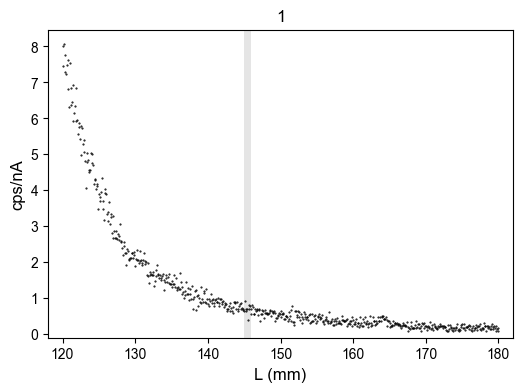

In [ ]:
# Read in the data
comments, data = readfiles.import_jeol_wdscans(
    subfolder=scan_path)

# Plot the data without fitting
wdscan.plot_wdscan(comments, data, save_to=None)

Figure not saved
Parameters not saved


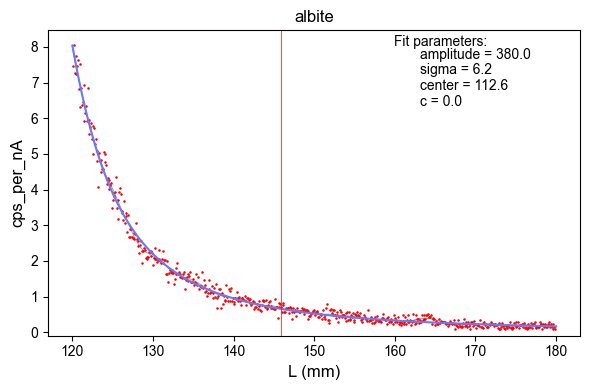

In [ ]:
# Fit and plot with the fits ------------
# Choose parts of the spectrum to use in the fit
bg_roi = [[120,180]]

trimmed_data = wdscan.trim_data_from_regions(data, bg_roi)
out = wdscan.fit_bg(trimmed_data)
wdscan.plot_bg_fit(data, trimmed_data, out, sample, pk_pos_markers, save_to=None)
par_dict = wdscan.write_fit_params(out, sample, save_to=None)

# Albite quant analyses 

What was the point of an albite analysis?

In [ ]:
samples = ['albite'] # List of samples in this dataset
sample_folders = [Path('../data/raw/hyalophane_StA/albite_quant/')] # List of folders corresponding to the samples
category = 'albite' # Category of this dataset (e.g. "glasses")

wd_scan = Path('data/interim/buddingtonite_ANU/fits/key_params_buddingtonite.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('data/_dictionaries/standards.csv')

In [ ]:
datalist = readfiles.find_files_and_folders(
                samples, sample_folders,
                # apf_file=Path('data/_dictionaries/apf_values.csv'), #<- Can put None in here
                # wd_scan=wd_scan
                )

datalist

Comments found: ['albite_1', 'albite_2', 'albite_3', 'albite_4', 'albite_5']


,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\hyalophane_StA\albite_quant\Pos_0001,albite_1,albite,None,1,0.0
1,..\data\raw\hyalophane_StA\albite_quant\Pos_0002,albite_2,albite,None,1,0.0
2,..\data\raw\hyalophane_StA\albite_quant\Pos_0003,albite_3,albite,None,1,0.0
3,..\data\raw\hyalophane_StA\albite_quant\Pos_0004,albite_4,albite,None,1,0.0
4,..\data\raw\hyalophane_StA\albite_quant\Pos_0005,albite_5,albite,None,1,0.0


In [ ]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
#     myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()

Read dataset: 1 of 5 : albite_1
Read dataset: 2 of 5 : albite_2
Read dataset: 3 of 5 : albite_3
Read dataset: 4 of 5 : albite_4
Read dataset: 5 of 5 : albite_5


In [ ]:
myspot[0].peak

,element,pos,net_cps,stdev_net_cps,dl_ppm,kraw_pcnt,time,raw_cps,kraw_stdev_pcnt,stdev_raw_cps
0,N,146.893,-22.6,100.0,236.0,0.0,120.0,33.116667,100.000162,0.525331
1,N,146.893,-162.5,100.0,439.0,0.0,1.0,30.046429,100.000162,5.481462


In [ ]:
myspot[0].standard

,element,xray,crystal,pos,nA,net_cps,lwr_cps,upr_cps,standard,stdev_net_cps
0,N,Ka,LDE1L,146.893,50.54,2301.2,88.1,68.8,BN,0.18
1,N,Ka,LDE1L,146.893,50.54,2301.2,88.1,68.8,BN,0.18


Okay, so I only analysed nitrogen in this albite. I have five analyses for which all have raw cps values. So I can use these raw cps values (at the peak position) to correct the raw cps values for hyalophane as an alternative to the background correction method - and maybe show that the background correction method is just as good!

That's actually pretty cool

In [ ]:
[s.peak.loc[0, "raw_cps"] for s in myspot]

[33.116666666666696,
 33.079999999999984,
 32.84666666666667,
 33.09333333333336,
 33.55666666666667]

That's the raw cps. 